___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 7<br><br>Image Classification with CNN<br><br>Malaria Data<br><h1>


# Dataset Info

The dataset contains 2 folders - 'parasitized', 'uninfected'

And a total of 27,558 images.

This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ 

Malaria remains a major burden on global health, with roughly 200 million cases worldwide and more than 400,000 deaths per year. Besides biomedical research and political efforts, modern information technology is playing a key role in many attempts at fighting the disease.

Malaria is caused by protozoan parasites of the genus Plasmodium that are transmitted through the bites of infected female Anopheles mosquitoes and that infect the red blood cells. Most deaths occur among children in Africa, where a child dies almost every minute from malaria, and where malaria is a leading cause of childhood neuro-disability. According to the World Malaria Report 2016,1 an estimated 3.2 billion people in 95 countries and territories are at risk of being infected with malaria and developing disease, and 1.2 billion are at high risk (>1 in 1000 chance of getting malaria in a year). 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5840030/

# Import Libraries and Export Images from Zip_File

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/cell_images.zip", "r")
zip_ref.extractall()
zip_ref.close()

# Recognizing and Understanding Data

In [5]:
my_data_dir = "cell_images"

In [6]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['test', 'train']

In [7]:
test_path = my_data_dir + '/test/'
train_path = my_data_dir + '/train/'

In [8]:
os.listdir(test_path)

['uninfected', 'parasitized']

In [9]:
os.listdir(train_path)

['uninfected', 'parasitized']

In [10]:
classes = os.listdir(train_path)
classes

['uninfected', 'parasitized']

In [11]:
# Alternative method
import pathlib

data_dir = pathlib.Path(train_path) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['parasitized' 'uninfected']


In [12]:
class_names

array(['parasitized', 'uninfected'], dtype='<U11')

**Let's check how many images there are.**

In [13]:
os.listdir(train_path+'parasitized')

['C144P105ThinF_IMG_20151015_155004_cell_310.png',
 'C39P4thinF_original_IMG_20150622_105253_cell_92.png',
 'C186P147NThinF_IMG_20151203_150408_cell_184.png',
 'C46P7ThinF_IMG_20151130_205828_cell_151.png',
 'C45P6ThinF_IMG_20151130_155110_cell_207.png',
 'C39P4thinF_original_IMG_20150622_105335_cell_27.png',
 'C185P146ThinF_IMG_20151203_110344_cell_265.png',
 'C48P9thinF_IMG_20150721_161243_cell_153.png',
 'C172P133ThinF_IMG_20151119_155156_cell_255.png',
 'C60P21thinF_IMG_20150804_113011_cell_2.png',
 'C129P90ThinF_IMG_20151004_134636_cell_5.png',
 'C37BP2_thinF_IMG_20150620_131423a_cell_93.png',
 'C91P52ThinF_IMG_20150821_124311_cell_27.png',
 'C39P4thinF_original_IMG_20150622_110115_cell_130.png',
 'C132P93ThinF_IMG_20151004_153030_cell_1.png',
 'C68P29N_ThinF_IMG_20150819_134504_cell_134.png',
 'C80P41ThinF_IMG_20150817_111943_cell_19.png',
 'C68P29N_ThinF_IMG_20150819_134830_cell_26.png',
 'C186P147NThinF_IMG_20151203_150808_cell_132.png',
 'C182P143NThinF_IMG_20151201_172759_cel

In [14]:
len(os.listdir(train_path+'parasitized')), len(os.listdir(train_path+'uninfected'))

(12479, 12479)

In [15]:
len(os.listdir(test_path+'parasitized')), len(os.listdir(test_path+'uninfected'))

(1300, 1300)

In [16]:
# Walk through cell_images directory and list number of files
for dirpath, dirnames, filenames in os.walk(my_data_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'cell_images'.
There are 2 directories and 0 images in 'cell_images/test'.
There are 0 directories and 1300 images in 'cell_images/test/uninfected'.
There are 0 directories and 1300 images in 'cell_images/test/parasitized'.
There are 2 directories and 0 images in 'cell_images/train'.
There are 0 directories and 12479 images in 'cell_images/train/uninfected'.
There are 0 directories and 12479 images in 'cell_images/train/parasitized'.


**Let's take an example images from both train-parasitized and train-uninfected folders to observe process** 

In [17]:
os.listdir(train_path+'parasitized')[:10]

['C144P105ThinF_IMG_20151015_155004_cell_310.png',
 'C39P4thinF_original_IMG_20150622_105253_cell_92.png',
 'C186P147NThinF_IMG_20151203_150408_cell_184.png',
 'C46P7ThinF_IMG_20151130_205828_cell_151.png',
 'C45P6ThinF_IMG_20151130_155110_cell_207.png',
 'C39P4thinF_original_IMG_20150622_105335_cell_27.png',
 'C185P146ThinF_IMG_20151203_110344_cell_265.png',
 'C48P9thinF_IMG_20150721_161243_cell_153.png',
 'C172P133ThinF_IMG_20151119_155156_cell_255.png',
 'C60P21thinF_IMG_20150804_113011_cell_2.png']

In [18]:
os.listdir(train_path+'parasitized')[5]

'C39P4thinF_original_IMG_20150622_105335_cell_27.png'

In [19]:
para_cell_path = train_path+'parasitized'+'/C68P29N_ThinF_IMG_20150819_134504_cell_120.png'

In [20]:
para_cell_path

'cell_images/train/parasitized/C68P29N_ThinF_IMG_20150819_134504_cell_120.png'

In [21]:
imread(para_cell_path)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [22]:
para_cell= imread(para_cell_path)

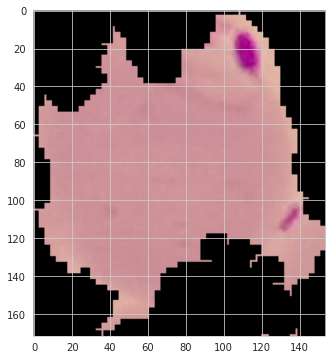

In [23]:
plt.imshow(para_cell);

In [24]:
para_cell.shape

(172, 154, 3)

In [128]:
os.listdir(train_path+'uninfected')[:10]

['C130P91ThinF_IMG_20151004_141428_cell_23.png',
 'C170P131ThinF_IMG_20151119_120150_cell_121.png',
 'C52P13thinF_IMG_20150725_124830_cell_86.png',
 'C75P36_ThinF_IMG_20150815_163015_cell_14.png',
 'C117P78ThinF_IMG_20150930_221927_cell_67.png',
 'C183P144NThinF_IMG_20151201_223208_cell_50.png',
 'C184P145ThinF_IMG_20151203_103326_cell_87.png',
 'C95P56ThinF_IMG_20150821_171530_cell_4.png',
 'C120P81ThinF_IMG_20151002_130918_cell_153.png',
 'C232ThinF_IMG_20151112_154211_cell_158.png']

In [26]:
uninfected_cell_path = train_path+'uninfected/'+os.listdir(train_path+'uninfected')[5]

In [27]:
imread(uninfected_cell_path)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

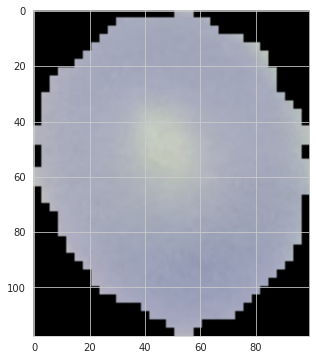

In [28]:
#plt.imshow(imread(uninfected_cell_path));
uninfected_cell = imread(uninfected_cell_path)
plt.imshow(uninfected_cell);

In [29]:
uninfected_cell.shape

(118, 100, 3)

In [30]:
# View a random image
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (142, 115, 3)


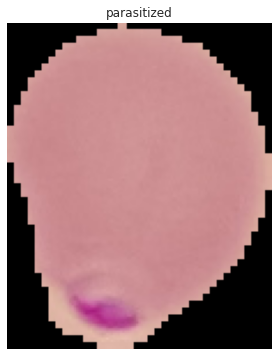

In [116]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path,
                        target_class="parasitized")

Image shape: (115, 115, 3)


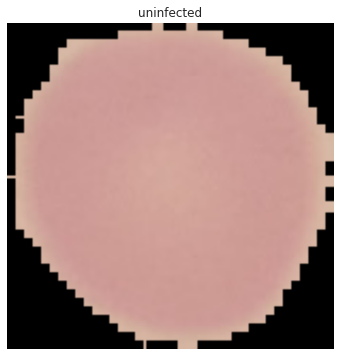

In [119]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path,
                        target_class="uninfected")

Image shape: (115, 106, 3)


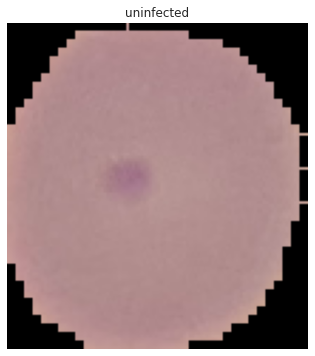

In [124]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_path,
                        target_class=random.choice(class_names)) # get a random class name

# Data Preprocessing

## Defining Input Shape

**Let's decide on the final dimension of these images.**

In [34]:
uninfected_cell.shape

(118, 100, 3)

In [35]:
para_cell.shape

(172, 154, 3)

x = []
y = []

for image in os.listdir(train_path+'uninfected'):
    img = imread(train_path+'uninfected/'+image)
    d1,d2,_ = img.shape
    x.append(d1)
    y.append(d2)

In [36]:
x = [imread(train_path+'uninfected/'+image).shape[0] for image in os.listdir(train_path+'uninfected')] 
y = [imread(train_path+'uninfected/'+image).shape[1] for image in os.listdir(train_path+'uninfected')] 

In [ ]:
# x = [imread(train_path+'uninfected/'+image).shape[0] for image in os.listdir(train_path+'uninfected') if 'Thumbs.db' not in image]
# y = [imread(train_path+'uninfected/'+image).shape[1] for image in os.listdir(train_path+'uninfected') if 'Thumbs.db' not in image]

In [37]:
x[:5]

[139, 133, 127, 154, 136]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


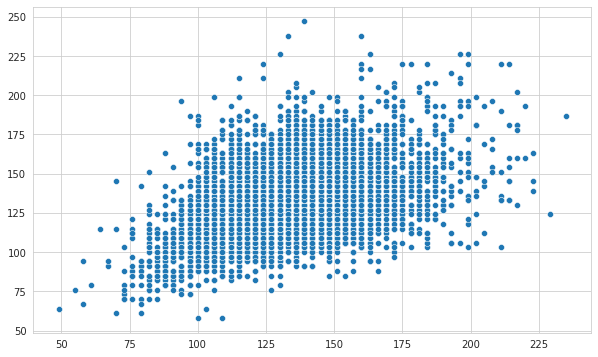

In [38]:
sns.scatterplot(x,y);

In [39]:
np.mean(x), np.median(x)

(131.64820899110507, 130.0)

In [40]:
np.mean(y), np.median(y)

(131.4041990544114, 130.0)

In [41]:
image_shape = (130,130,3)

## Scaling

**Let's check the images if they are needed to be scaled or not**

In [42]:
uninfected_cell.max()

0.81960785

In [125]:
uninfected_cell.min()

0.0

In [43]:
para_cell.max()

0.9372549

In [126]:
para_cell.min()

0.0

As we see above, all images have been already scaled

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [127]:
# help(ImageDataGenerator)

In [46]:
image_gen = ImageDataGenerator(rotation_range=15, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               #rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

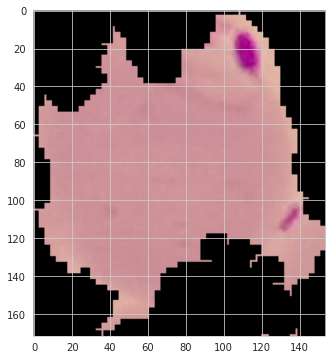

In [47]:
plt.imshow(para_cell);

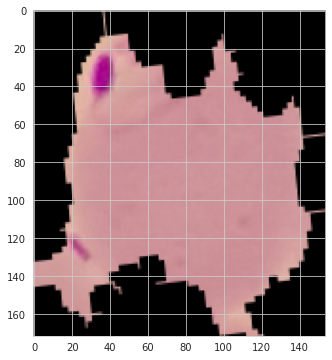

In [130]:
plt.imshow(image_gen.random_transform(para_cell));

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

In [49]:
#help(image_gen.flow_from_directory)
#Takes the path to a directory & generates batches of augmented data.

In [50]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [51]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [52]:
batch_size = 32

In [53]:
image_shape

(130, 130, 3)

In [54]:
train_image_gen = image_gen.flow_from_directory(directory=train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=True)

Found 24958 images belonging to 2 classes.


In [55]:
test_image_gen = image_gen.flow_from_directory(directory=test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 2600 images belonging to 2 classes.


In [56]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [57]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [58]:
# train_image_gen[0]

In [59]:
train_image_gen[0][0].shape

(32, 130, 130, 3)

In [144]:
type(train_image_gen[0][0])

numpy.ndarray

In [60]:
train_image_gen[0][0][0].shape

(130, 130, 3)

In [61]:
len(train_image_gen), len(test_image_gen)

(780, 82)

In [62]:
len(train_image_gen)*batch_size, len(test_image_gen)*batch_size 

(24960, 2624)

In [63]:
# Get a sample of the training data batch 
images, labels = train_image_gen.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [64]:
# Get a sample of the testing data batch 
images, labels = test_image_gen.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

# Modelling-1

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [142]:
model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))


model1.add(Flatten())


model1.add(Dense(128))
model1.add(Activation('relu'))

model1.add(Dropout(0.5))

model1.add(Dense(1))
model1.add(Activation('sigmoid'))

# optimizer = keras.optimizers.Adam(lr=0.01)
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [67]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [138]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [ ]:
model1.fit(train_image_gen,
          epochs=15,
          steps_per_epoch=len(train_image_gen),
          validation_data=test_image_gen,
          validation_steps=len(test_image_gen),
          callbacks=[early_stop])

Epoch 1/15
780/780 [==============================] - 129s 165ms/step - loss: 0.6694 - accuracy: 0.5960 - val_loss: 0.6723 - val_accuracy: 0.5988
Epoch 2/15
780/780 [==============================] - 129s 165ms/step - loss: 0.6736 - accuracy: 0.5915 - val_loss: 0.6636 - val_accuracy: 0.6108
Epoch 3/15
780/780 [==============================] - 126s 162ms/step - loss: 0.6721 - accuracy: 0.6013 - val_loss: 0.6586 - val_accuracy: 0.6135
Epoch 4/15
780/780 [==============================] - 126s 162ms/step - loss: 0.6616 - accuracy: 0.6105 - val_loss: 0.6561 - val_accuracy: 0.6127
Epoch 5/15
780/780 [==============================] - 127s 163ms/step - loss: 0.5851 - accuracy: 0.6932 - val_loss: 0.2390 - val_accuracy: 0.9238
Epoch 6/15
780/780 [==============================] - 128s 165ms/step - loss: 0.2109 - accuracy: 0.9335 - val_loss: 0.1813 - val_accuracy: 0.9377
Epoch 7/15
780/780 [==============================] - 126s 161ms/step - loss: 0.1781 - accuracy: 0.9452 - val_loss: 0.1766 -

In [70]:
model1.metrics_names

['loss', 'accuracy']

In [71]:
summary = pd.DataFrame(model1.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.440,0.557,0.671,0.597
1,0.673,0.588,0.670,0.598
2,0.666,0.608,0.659,0.614
3,0.665,0.605,0.677,0.574
4,0.661,0.609,0.654,0.620


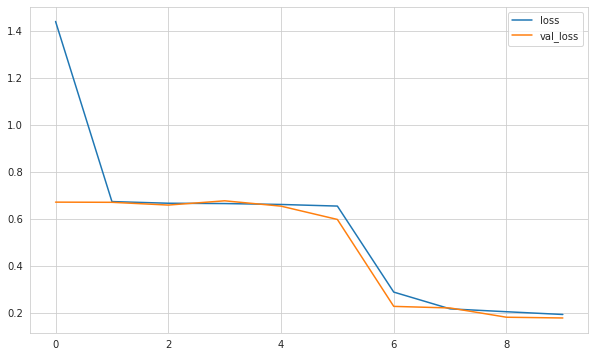

In [72]:
summary[["loss", "val_loss"]].plot();

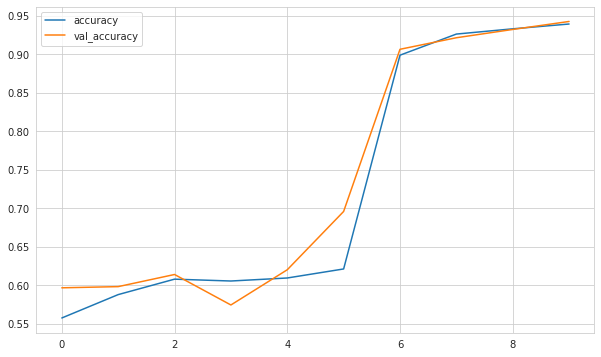

In [73]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
score = model1.evaluate(test_image_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

82/82 [==============================] - 12s 143ms/step - loss: 0.1746 - accuracy: 0.9400
Test loss: 0.17463840544223785
Test accuracy: 0.9399999976158142


In [76]:
pred_prob = model1.predict(test_image_gen)

In [77]:
pred_prob

array([[5.2206160e-04],
       [4.9674523e-04],
       [1.2885885e-04],
       ...,
       [9.4114703e-01],
       [9.7858733e-01],
       [8.9903992e-01]], dtype=float32)

In [135]:
y_pred = pred_prob > 0.5

In [136]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [80]:
y_test = test_image_gen.classes
y_test

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1300
           1       0.93      0.96      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [82]:
confusion_matrix(y_test, y_pred)

array([[1203,   97],
       [  57, 1243]])

# Modelling-2

In [83]:
model2 = Sequential()

model2.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, padding='same', activation='relu',))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))


model2.add(Flatten())


model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))

model2.add(Dense(1))
model2.add(Activation('sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [84]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 130, 130, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 65, 65, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 65, 65, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 65, 65, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 256)      

In [85]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

In [86]:
model2.fit(train_image_gen,
          epochs=8,
          steps_per_epoch=len(train_image_gen),
          validation_data=test_image_gen,
          validation_steps=len(test_image_gen),
          callbacks=[early_stop])

Epoch 1/8
780/780 [==============================] - 148s 186ms/step - loss: 0.7398 - accuracy: 0.5155 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/8
780/780 [==============================] - 142s 182ms/step - loss: 0.6919 - accuracy: 0.5217 - val_loss: 0.6792 - val_accuracy: 0.5681
Epoch 3/8
780/780 [==============================] - 142s 183ms/step - loss: 0.6413 - accuracy: 0.6110 - val_loss: 0.2793 - val_accuracy: 0.9262
Epoch 4/8
780/780 [==============================] - 142s 182ms/step - loss: 0.2012 - accuracy: 0.9388 - val_loss: 0.1921 - val_accuracy: 0.9415
Epoch 5/8
780/780 [==============================] - 142s 182ms/step - loss: 0.1706 - accuracy: 0.9495 - val_loss: 0.1700 - val_accuracy: 0.9458
Epoch 6/8
780/780 [==============================] - 142s 182ms/step - loss: 0.1630 - accuracy: 0.9515 - val_loss: 0.1641 - val_accuracy: 0.9469
Epoch 7/8
780/780 [==============================] - 142s 182ms/step - loss: 0.1579 - accuracy: 0.9520 - val_loss: 0.1496 - val_ac

In [87]:
model2.metrics_names

['loss', 'accuracy']

In [88]:
summary = pd.DataFrame(model2.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.740,0.516,0.693,0.500
1,0.692,0.522,0.679,0.568
2,0.641,0.611,0.279,0.926
3,0.201,0.939,0.192,0.942
4,0.171,0.950,0.170,0.946


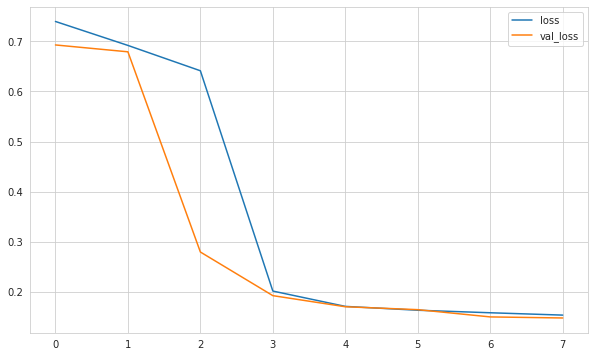

In [89]:
summary[["loss", "val_loss"]].plot();

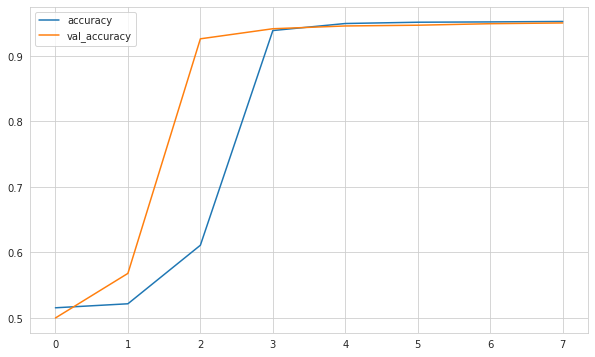

In [90]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [91]:
score = model2.evaluate(test_image_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

82/82 [==============================] - 12s 152ms/step - loss: 0.1486 - accuracy: 0.9504
Test loss: 0.14862090349197388
Test accuracy: 0.9503846168518066


In [92]:
pred_prob = model2.predict(test_image_gen)

In [93]:
y_pred = pred_prob > 0.5

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1300
           1       0.95      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



                precision    recall  f1-score   support

           0       0.96      0.93      0.95      1300
           1       0.93      0.97      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600

In [95]:
confusion_matrix(y_test, y_pred)

array([[1230,   70],
       [  57, 1243]])

In [96]:
model1.save('malaria_model.h5')

# Prediction

In [4]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [5]:
model=load_model('malaria_model.h5')

OSError: ignored

In [ ]:
target_class=random.choice(class_names)
target_class

In [ ]:
random_image = random.sample(os.listdir(test_path + target_class), 1)
random_image

In [ ]:
image_path = test_path + target_class + "/" + random_image[0]
image_path

In [ ]:
my_image = image.load_img(image_path, target_size=image_shape)

In [ ]:
my_image

In [ ]:
type(my_image)

In [ ]:
#my_image = np.array(my_image)
my_image = image.img_to_array(my_image)

In [ ]:
my_image.shape

In [ ]:
my_image = np.expand_dims(my_image, axis=0)

In [ ]:
my_image.shape

In [ ]:
model.predict(my_image)

In [ ]:
train_image_gen.class_indices

In [ ]:
def pred_and_plot(model, img_size):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  target_class=random.choice(class_names)
  random_image = random.sample(os.listdir(test_path + target_class), 1)
  img_path = test_path + target_class + "/" + random_image[0]
  img = image.load_img(img_path, target_size=img_size)
  img = np.array(img)
  
  # Make a prediction
  pred = model.predict(np.expand_dims(img, axis=0))
  print("prediction_probability: ", pred.max())

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
pred_and_plot(model, (130, 130))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___